# Self Organizing Map To Analyze Outliers In Images Of Homer And Bart Sympson

In [1]:
import numpy as np
import pandas as pd

In [10]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pylab import pcolor, colorbar, plot

In [19]:
dataset = pd.read_csv('characters.csv')
dataset

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.000000,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.000000,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.000000,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.000000,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.000000,0.011593,Bart
...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.000000,0.000000,6.485412,0.093921,Homer
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.042194,Homer
290,0.000000,0.000000,0.000000,0.000000,4.263629,0.076761,Homer
291,0.000000,0.000000,0.000000,0.000000,1.429134,0.017013,Homer


In [20]:
x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [21]:
normalizer = MinMaxScaler(feature_range= (0, 1))

x = normalizer.fit_transform(x)

In [22]:
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [23]:
model = MiniSom(x=9 , y=9, input_len= 6, learning_rate= 0.5, random_seed= 0)

model.random_weights_init(x)

model.train_random(data= x, num_iteration= 500)

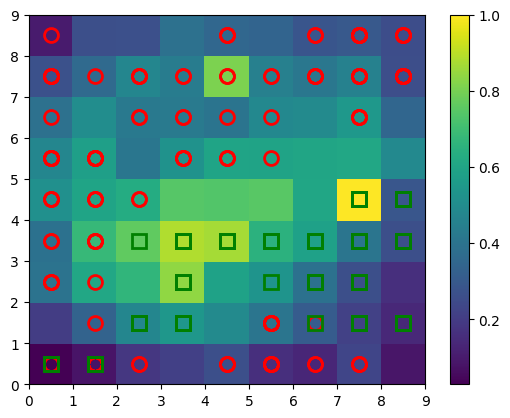

In [24]:
pcolor(model.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, element in enumerate(x):
    w = model.winner(element)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor= 'None', markersize= 10, markeredgecolor= colors[y[i]], markeredgewidth= 2)

In [25]:
mapping = model.win_map(x)
mapping

defaultdict(list,
            {(2,
              4): [array([0.35231348, 0.19711995, 0.32096694, 0.        , 0.        ,
                     0.01280093]), array([0.38042118, 0.09812541, 0.37606433, 0.        , 0.        ,
                     0.00281594])],
             (3,
              6): [array([0.25606564, 0.1795626 , 0.21617233, 0.        , 0.        ,
                     0.00671489]), array([0.24305389, 0.20305736, 0.15177841, 0.        , 0.        ,
                     0.01045222])],
             (3,
              7): [array([0.26935365, 0.28366032, 0.06129067, 0.        , 0.        ,
                     0.03082025]), array([0.3295778 , 0.31602128, 0.20177758, 0.        , 0.        ,
                     0.00600635])],
             (2,
              0): [array([0.        , 0.        , 0.        , 0.01486179, 0.        ,
                     0.0043035 ]), array([0.        , 0.        , 0.        , 0.02938348, 0.        ,
                     0.01588535])],
             (2,
 

In [28]:
outliers = mapping[(7, 4)]
outliers

[array([0.        , 0.        , 0.        , 0.        , 0.73807016,
        0.01555318]),
 array([0.        , 0.        , 0.        , 0.        , 0.60388168,
        0.00408678]),
 array([0.        , 0.        , 0.        , 0.        , 0.87210919,
        0.00595889]),
 array([0.        , 0.        , 0.        , 0.        , 0.77288528,
        0.00776952]),
 array([0.        , 0.        , 0.        , 0.        , 0.83770688,
        0.00973557]),
 array([0.        , 0.        , 0.        , 0.        , 1.        ,
        0.01898251]),
 array([0.        , 0.        , 0.        , 0.        , 0.73559918,
        0.01909753])]

In [29]:
outliers = normalizer.inverse_transform(outliers)
outliers

array([[0.        , 0.        , 0.        , 0.        , 6.507197  ,
        0.07648981],
       [0.        , 0.        , 0.        , 0.        , 5.324124  ,
        0.02009862],
       [0.        , 0.        , 0.        , 0.        , 7.6889524 ,
        0.02930552],
       [0.        , 0.        , 0.        , 0.        , 6.8141446 ,
        0.03821016],
       [0.        , 0.        , 0.        , 0.        , 7.3856444 ,
        0.04787907],
       [0.        , 0.        , 0.        , 0.        , 8.816502  ,
        0.09335512],
       [0.        , 0.        , 0.        , 0.        , 6.4854116 ,
        0.09392077]])